<b>NB!</b> The installment of Numpy / Pandas below were necessary to run the Numpy and Pandas dependent libraries.

In [5]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')

### Load data

In [7]:
# import json
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from geopy.distance import geodesic
# from IPython.display import display

# class AISData:
#     def __init__(self):
#         self.ais_train = None
#         self.ais_test = None
#         self.vessels = None

#         self.train = None
#         self.test = None
#         self.all = None
#         self.target = None
        
#         self.vessel_meta = None
        
#     def open(self):
#         """
#         Imports AIS data and merges it with vessel information.
#         """
#         self.ais_train = pd.read_csv('../data/cleaned/cleaned_ais_train_dataset.csv')  # Update with your path if needed
#         self.ais_test = pd.read_csv('../data/raw/ais_test.csv')  # Update with your path if needed
#         self.vessels = pd.read_csv('../data/cleaned/cleaned_vessels.csv')  # Update with your path if needed

#         # Merging AIS data with vessel information on 'vesselId'
#         self.train = pd.merge(self.ais_train, self.vessels.set_index('vesselId'), how='left', left_on='vesselId', right_index=True)
#         self.test = pd.merge(self.ais_test, self.vessels.set_index('vesselId'), how='left', left_on='vesselId', right_index=True)

#         print(f'Loaded {len(self.train)} training samples')
#         print(f'Loaded {len(self.test)} test samples \n')
        
#         self.all = pd.concat([self.train, self.test])
#         self.all['split'] = np.where(self.all.index <= len(self.train), 'Train', 'Test')

#     def describe_column(self, meta):
#         """
#         Utility function for describing a dataset column
#         """
#         def f(x):
#             d = pd.Series(name=x.name, dtype=object)
#             m = next((m for m in meta if m['name'] == x.name), None)
#             d['Type'] = m['type'] if m else 'Unknown'
#             d['#NaN'] = x.isna().sum()
#             d['Description'] = m['desc'] if m else 'No description'
#             if m and m['type'] == 'categorical':
#                 counts = x.dropna().value_counts().sort_index()
#                 d['Statistics'] = ', '.join(f'{c}({n})' for c, n in counts.items())
#             elif m and (m['type'] == 'real' or m['type'] == 'integer'):
#                 stats = x.dropna().agg(['mean', 'std', 'min', 'max'])
#                 d['Statistics'] = ', '.join(f'{s}={v :.1f}' for s, v in stats.items())
#             elif m and m['type'] == 'boolean':
#                 counts = x.dropna().astype(bool).value_counts().sort_index()
#                 d['Statistics'] = ', '.join(f'{c}({n})' for c, n in counts.items())
#             else:
#                 d['Statistics'] = f'#unique={x.nunique()}'
#             return d
#         return f

#     def describe_data(self, data, meta):
#         """
#         Describes the AIS data
#         """
#         df_desc = data.apply(self.describe_column(meta)).T
#         desc = df_desc.style.set_properties(**{'text-align': 'left'})
#         desc = desc.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
#         display(desc)
#         return meta

#     def plot_map(self, data, column='sog', title='Vessel Speed by Location'):
#         """
#         Plots vessel data on a map based on latitude and longitude
#         """
#         plt.figure(figsize=(12, 8), dpi=100)
#         ax = plt.gca()
        
#         # Plotting vessel data
#         sns.scatterplot(x='longitude', y='latitude', hue=data[column], ax=ax, s=10, alpha=0.6, palette='coolwarm', data=data)
        
#         ax.set_title(title)
#         ax.set_xlabel('Longitude')
#         ax.set_ylabel('Latitude')
#         plt.show()
#         return ax


# data = AISData()
# data.open()

# df_train = data.train
# df_test = data.test
# df_all = data.all

# # Define AIS metadata
# ais_meta = [
#     {'name': 'latitude', 'type': 'real', 'desc': 'Latitude of the vessel position'},
#     {'name': 'longitude', 'type': 'real', 'desc': 'Longitude of the vessel position'},
#     {'name': 'sog', 'type': 'real', 'desc': 'Speed over ground of the vessel'},
#     {'name': 'cog', 'type': 'real', 'desc': 'Course over ground of the vessel'},
#     {'name': 'rot', 'type': 'integer', 'desc': 'Rate of turn of the vessel'},
#     {'name': 'heading', 'type': 'integer', 'desc': 'Direction vessel’s bow is pointing'},
#     {'name': 'navstat', 'type': 'categorical', 'desc': 'Navigational status code'},
#     {'name': 'vesselId', 'type': 'categorical', 'desc': 'Unique vessel identifier'},
#     {'name': 'portId', 'type': 'categorical', 'desc': 'Port identifier'},
#     {'name': 'etaRaw', 'type': 'datetime', 'desc': 'Estimated time of arrival (ETA)'},
# ]

# # Describe AIS training data
# data.describe_data(df_train, ais_meta)

# # Define Vessel Metadata
# vessel_meta = [
#     {'name': 'CEU', 'type': 'integer', 'desc': 'Car Equivalent Units'},
#     {'name': 'DWT', 'type': 'real', 'desc': 'Deadweight tonnage'},
#     {'name': 'GT', 'type': 'real', 'desc': 'Gross Tonnage'},
#     {'name': 'vesselType', 'type': 'categorical', 'desc': 'Type of vessel'},
#     {'name': 'length', 'type': 'real', 'desc': 'Length of the vessel in meters'},
#     {'name': 'breadth', 'type': 'real', 'desc': 'Breadth of the vessel'},
#     {'name': 'maxSpeed', 'type': 'real', 'desc': 'Maximum speed of the vessel in knots'},
#     {'name': 'yearBuilt', 'type': 'integer', 'desc': 'Year the vessel was built'},
#     # Add other vessel metadata as necessary
# ]

# # Describe vessel data using the metadata
# data.describe_data(data.vessels, vessel_meta)

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class AISData:
    def __init__(self):
        self.ais_train = None
        self.ais_test = None
        self.vessels = None

        self.train = None
        self.test = None
        self.all = None
        self.target = None
        
        self.ais_meta = None
        self.vessel_meta = None
        
    def open(self):
        """
        Imports AIS data and merges it with vessel information.
        """
        self.ais_train = pd.read_csv('../data/cleaned/cleaned_ais_train_dataset.csv')  # Update with your path if needed
        self.ais_test = pd.read_csv('../data/raw/ais_test.csv')  # Update with your path if needed
        self.vessels = pd.read_csv('../data/cleaned/cleaned_vessels.csv')  # Update with your path if needed

        # Merging AIS data with vessel information on 'vesselId'
        self.train = pd.merge(self.ais_train, self.vessels.set_index('vesselId'), how='left', left_on='vesselId', right_index=True)
        self.test = pd.merge(self.ais_test, self.vessels.set_index('vesselId'), how='left', left_on='vesselId', right_index=True)

        print(f'Loaded {len(self.train)} training samples')
        print(f'Loaded {len(self.test)} test samples \n')
        
        self.all = pd.concat([self.train, self.test])
        self.all['split'] = np.where(self.all.index <= len(self.train), 'Train', 'Test')

    def describe_column(self, meta):
        """
        Utility function for describing a dataset column.
        """
        def f(x):
            d = pd.Series(name=x.name, dtype=object)
            m = next((m for m in meta if m['name'] == x.name), None)
            d['Type'] = m['type'] if m else 'Unknown'
            d['#NaN'] = x.isna().sum()
            d['Description'] = m['desc'] if m else 'No description'
            if m and m['type'] == 'categorical':
                counts = x.dropna().value_counts().sort_index()
                d['Statistics'] = ', '.join(f'{c}({n})' for c, n in counts.items())
            elif m and (m['type'] == 'real' or m['type'] == 'integer'):
                stats = x.dropna().agg(['mean', 'std', 'min', 'max'])
                d['Statistics'] = ', '.join(f'{s}={v :.1f}' for s, v in stats.items())
            elif m and m['type'] == 'boolean':
                counts = x.dropna().astype(bool).value_counts().sort_index()
                d['Statistics'] = ', '.join(f'{c}({n})' for c, n in counts.items())
            else:
                d['Statistics'] = f'#unique={x.nunique()}'
            return d
        return f

    def describe_data(self, data, meta):
        """
        Describes the AIS data using metadata.
        """
        df_desc = data.apply(self.describe_column(meta)).T
        desc = df_desc.style.set_properties(**{'text-align': 'left'})
        desc = desc.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
        display(desc)
        return meta

    def plot_correlation_heatmap(self, data, title='Correlation Heatmap'):
        """
        Plots a correlation heatmap for numeric features in the dataset.
        """
        plt.figure(figsize=(12, 8))
        corr = data.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(title)
        plt.show()

    def plot_feature_importance(self, features, target, n_estimators=100):
        """
        Fits a random forest regressor and plots feature importances.
        """
        # Select only numeric columns from the features
        numeric_features = features.select_dtypes(include=[np.number])
        
        # Handle NaN values: fill with the median value of each column
        numeric_features = numeric_features.fillna(numeric_features.median())
        target = target.fillna(target.median())

        # Replace infinite values with NaN and fill again
        numeric_features.replace([np.inf, -np.inf], np.nan, inplace=True)
        numeric_features = numeric_features.fillna(numeric_features.median())

        # Ensure that values fit within the range of float32
        numeric_features = numeric_features.astype(np.float32)

        # Splitting data
        X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        rf.fit(X_train, y_train)
        
        # Feature importances
        importance = rf.feature_importances_
        indices = np.argsort(importance)[::-1]
        feature_names = numeric_features.columns
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importance[indices], y=feature_names[indices])
        plt.title("Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()
        
        # Evaluate the model
        y_pred = rf.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f'Root Mean Squared Error: {rmse:.2f}')
        
    def plot_distribution(self, column, title='Distribution'):
        """
        Plots the distribution of a given numerical column.
        """
        plt.figure(figsize=(10, 6))
        sns.histplot(self.train[column], kde=True, bins=30)
        plt.title(f'{title}: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
    def plot_scatter(self, x_col, y_col, hue_col=None, title='Scatter Plot'):
        """
        Plots a scatter plot between two columns with an optional hue parameter.
        """
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=self.train, palette='viridis', alpha=0.7)
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()


data = AISData()
data.open()

#data.plot_correlation_heatmap(data.train)

#target_col = 'sog'  # Example target column; replace with your target
#features = data.train.drop(columns=[target_col, 'vesselId', 'etaRaw', 'homePort'])  # Drop non-numeric columns
#target = data.train[target_col]
#data.plot_feature_importance(features, target)

#data.plot_distribution('sog')

#data.plot_scatter('longitude', 'latitude', hue_col='vesselType', title='Vessel Positions by Type')

Loaded 1515960 training samples
Loaded 51739 test samples 



## 2. Exploratory Data Analysis (EDA)

Import relevant modules

In [8]:
#import geopandas as gpd
import math 

from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
#from shapely.geometry import Point, Polygon

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2.1 Open data

In [9]:
# Instantiate and Load AIS Data
data = AISData()
data.open()

# Assign data subsets
df_train = data.train
df_test = data.test
df_all = data.all

# Print Meta AIS Training Data Description
print("Meta AIS training data description:")

# Define AIS metadata for descriptive purposes
ais_meta = [
    {'name': 'latitude', 'type': 'real', 'desc': 'Latitude of the vessel position'},
    {'name': 'longitude', 'type': 'real', 'desc': 'Longitude of the vessel position'},
    {'name': 'sog', 'type': 'real', 'desc': 'Speed over ground of the vessel'},
    {'name': 'cog', 'type': 'real', 'desc': 'Course over ground of the vessel'},
    {'name': 'rot', 'type': 'integer', 'desc': 'Rate of turn of the vessel'},
    {'name': 'heading', 'type': 'integer', 'desc': 'Direction vessel’s bow is pointing'},
    {'name': 'navstat', 'type': 'categorical', 'desc': 'Navigational status code'},
    {'name': 'vesselId', 'type': 'categorical', 'desc': 'Unique vessel identifier'},
    {'name': 'portId', 'type': 'categorical', 'desc': 'Port identifier'},
    {'name': 'etaRaw', 'type': 'datetime', 'desc': 'Estimated time of arrival (ETA)'},
    # Add more metadata as needed for other columns
]

# Describe the AIS training data using metadata
data.describe_data(df_train, ais_meta)

# Print Meta Vessel Data Description
print("\nMeta vessel data description:")

# Define Vessel metadata for descriptive purposes
vessel_meta = [
    {'name': 'shippingLineId', 'type': 'categorical', 'desc': 'Shipping line identifier'},
    {'name': 'CEU', 'type': 'integer', 'desc': 'Car Equivalent Units'},
    {'name': 'DWT', 'type': 'real', 'desc': 'Deadweight tonnage'},
    {'name': 'GT', 'type': 'real', 'desc': 'Gross tonnage'},
    {'name': 'NT', 'type': 'real', 'desc': 'Net tonnage'},
    {'name': 'vesselType', 'type': 'categorical', 'desc': 'Type of vessel'},
    {'name': 'breadth', 'type': 'real', 'desc': 'Breadth of the vessel'},
    {'name': 'depth', 'type': 'real', 'desc': 'Depth of the vessel'},
    {'name': 'draft', 'type': 'real', 'desc': 'Draft of the vessel'},
    {'name': 'enginePower', 'type': 'real', 'desc': 'Engine power of the vessel'},
    {'name': 'freshWater', 'type': 'real', 'desc': 'Freshwater capacity'},
    {'name': 'fuel', 'type': 'real', 'desc': 'Fuel capacity'},
    {'name': 'homePort', 'type': 'categorical', 'desc': 'Home port of the vessel'},
    {'name': 'length', 'type': 'real', 'desc': 'Length of the vessel'},
    {'name': 'maxHeight', 'type': 'real', 'desc': 'Maximum height of the vessel'},
    {'name': 'maxSpeed', 'type': 'real', 'desc': 'Maximum speed of the vessel'},
    {'name': 'maxWidth', 'type': 'real', 'desc': 'Maximum width of the vessel'},
    {'name': 'rampCapacity', 'type': 'real', 'desc': 'Ramp capacity'},
    {'name': 'yearBuilt', 'type': 'integer', 'desc': 'Year the vessel was built'},
]

# Describe the vessel data using the metadata
data.describe_data(data.vessels, vessel_meta)





Loaded 1515960 training samples
Loaded 51739 test samples 

Meta AIS training data description:



Meta vessel data description:


,Type,#NaN,Description,Statistics
shippingLineId,categorical,0,Shipping line identifier,"61a8e672f9cba188601e84ab(40), 61a8e672f9cba188601e84ac(72), 61a8e673f9cba188601e84ad(69), 61a8e673f9cba188601e84ae(61), 61a8e673f9cba188601e84b2(4), 61a8e673f9cba188601e84b3(20), 61a8e673f9cba188601e84b5(13), 61a8e673f9cba188601e84b8(1), 61a8e673f9cba188601e84b9(51), 61a8e673f9cba188601e84ba(6), 61a8e673f9cba188601e84bb(17), 61a8e673f9cba188601e84bc(3), 61a8e674f9cba188601e84c2(18), 61be24564ea00ae59d0fe378(5), 61be24564ea00ae59d0fe379(61), 61be24564ea00ae59d0fe37a(77), 61be24564ea00ae59d0fe37f(5), 61be24564ea00ae59d0fe380(4), 61be24574ea00ae59d0fe388(13), 61be24574ea00ae59d0fe38d(1), 61e213d5d612676a0f0fb755(18), 61ec6303a8cafc0e93f0e8f3(79), 61ec643ca8cafc0e93f0e8f9(19), 61ec65aea8cafc0e93f0e900(45), 61ec68d6a8cafc0e93f0e907(2), 61ec94f1a8cafc0e93f0e92a(5), clh4x6qc5000008lf4vi15u9m(2)"
vesselId,Unknown,0,No description,#unique=711
CEU,integer,0,Car Equivalent Units,"mean=5006.5, std=2186.3, min=0.0, max=8500.0"
DWT,real,8,Deadweight tonnage,"mean=18556.3, std=8563.0, min=3222.0, max=108650.0"
GT,real,0,Gross tonnage,"mean=51207.5, std=16329.9, min=8659.0, max=100430.0"
NT,real,524,Net tonnage,"mean=17931.3, std=3838.3, min=3137.0, max=29329.0"
vesselType,categorical,0,Type of vessel,"14.0(2), 21.0(117), 83.0(580), Unknown(12)"
breadth,real,8,Breadth of the vessel,"mean=31.1, std=3.6, min=18.0, max=42.0"
depth,real,469,Depth of the vessel,"mean=21.4, std=2.7, min=11.9, max=32.6"
draft,real,701,Draft of the vessel,"mean=9.8, std=3.2, min=5.8, max=15.4"


[{'name': 'shippingLineId',
  'type': 'categorical',
  'desc': 'Shipping line identifier'},
 {'name': 'CEU', 'type': 'integer', 'desc': 'Car Equivalent Units'},
 {'name': 'DWT', 'type': 'real', 'desc': 'Deadweight tonnage'},
 {'name': 'GT', 'type': 'real', 'desc': 'Gross tonnage'},
 {'name': 'NT', 'type': 'real', 'desc': 'Net tonnage'},
 {'name': 'vesselType', 'type': 'categorical', 'desc': 'Type of vessel'},
 {'name': 'breadth', 'type': 'real', 'desc': 'Breadth of the vessel'},
 {'name': 'depth', 'type': 'real', 'desc': 'Depth of the vessel'},
 {'name': 'draft', 'type': 'real', 'desc': 'Draft of the vessel'},
 {'name': 'enginePower', 'type': 'real', 'desc': 'Engine power of the vessel'},
 {'name': 'freshWater', 'type': 'real', 'desc': 'Freshwater capacity'},
 {'name': 'fuel', 'type': 'real', 'desc': 'Fuel capacity'},
 {'name': 'homePort',
  'type': 'categorical',
  'desc': 'Home port of the vessel'},
 {'name': 'length', 'type': 'real', 'desc': 'Length of the vessel'},
 {'name': 'maxHe

### 2.2 Individual feature analysis by AIS

In [13]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_train.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['sog'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}'.format(df_test.shape[0]))

Number of Training Examples = 1515960
Number of Test Examples = 1515960

Training X Shape = (1515960, 30)
Training y Shape = 1515960

Test X Shape = (51739, 23)
Test y Shape = 51739


#### Speed over Ground (SOG)

Number of NaN values in SOG: 0


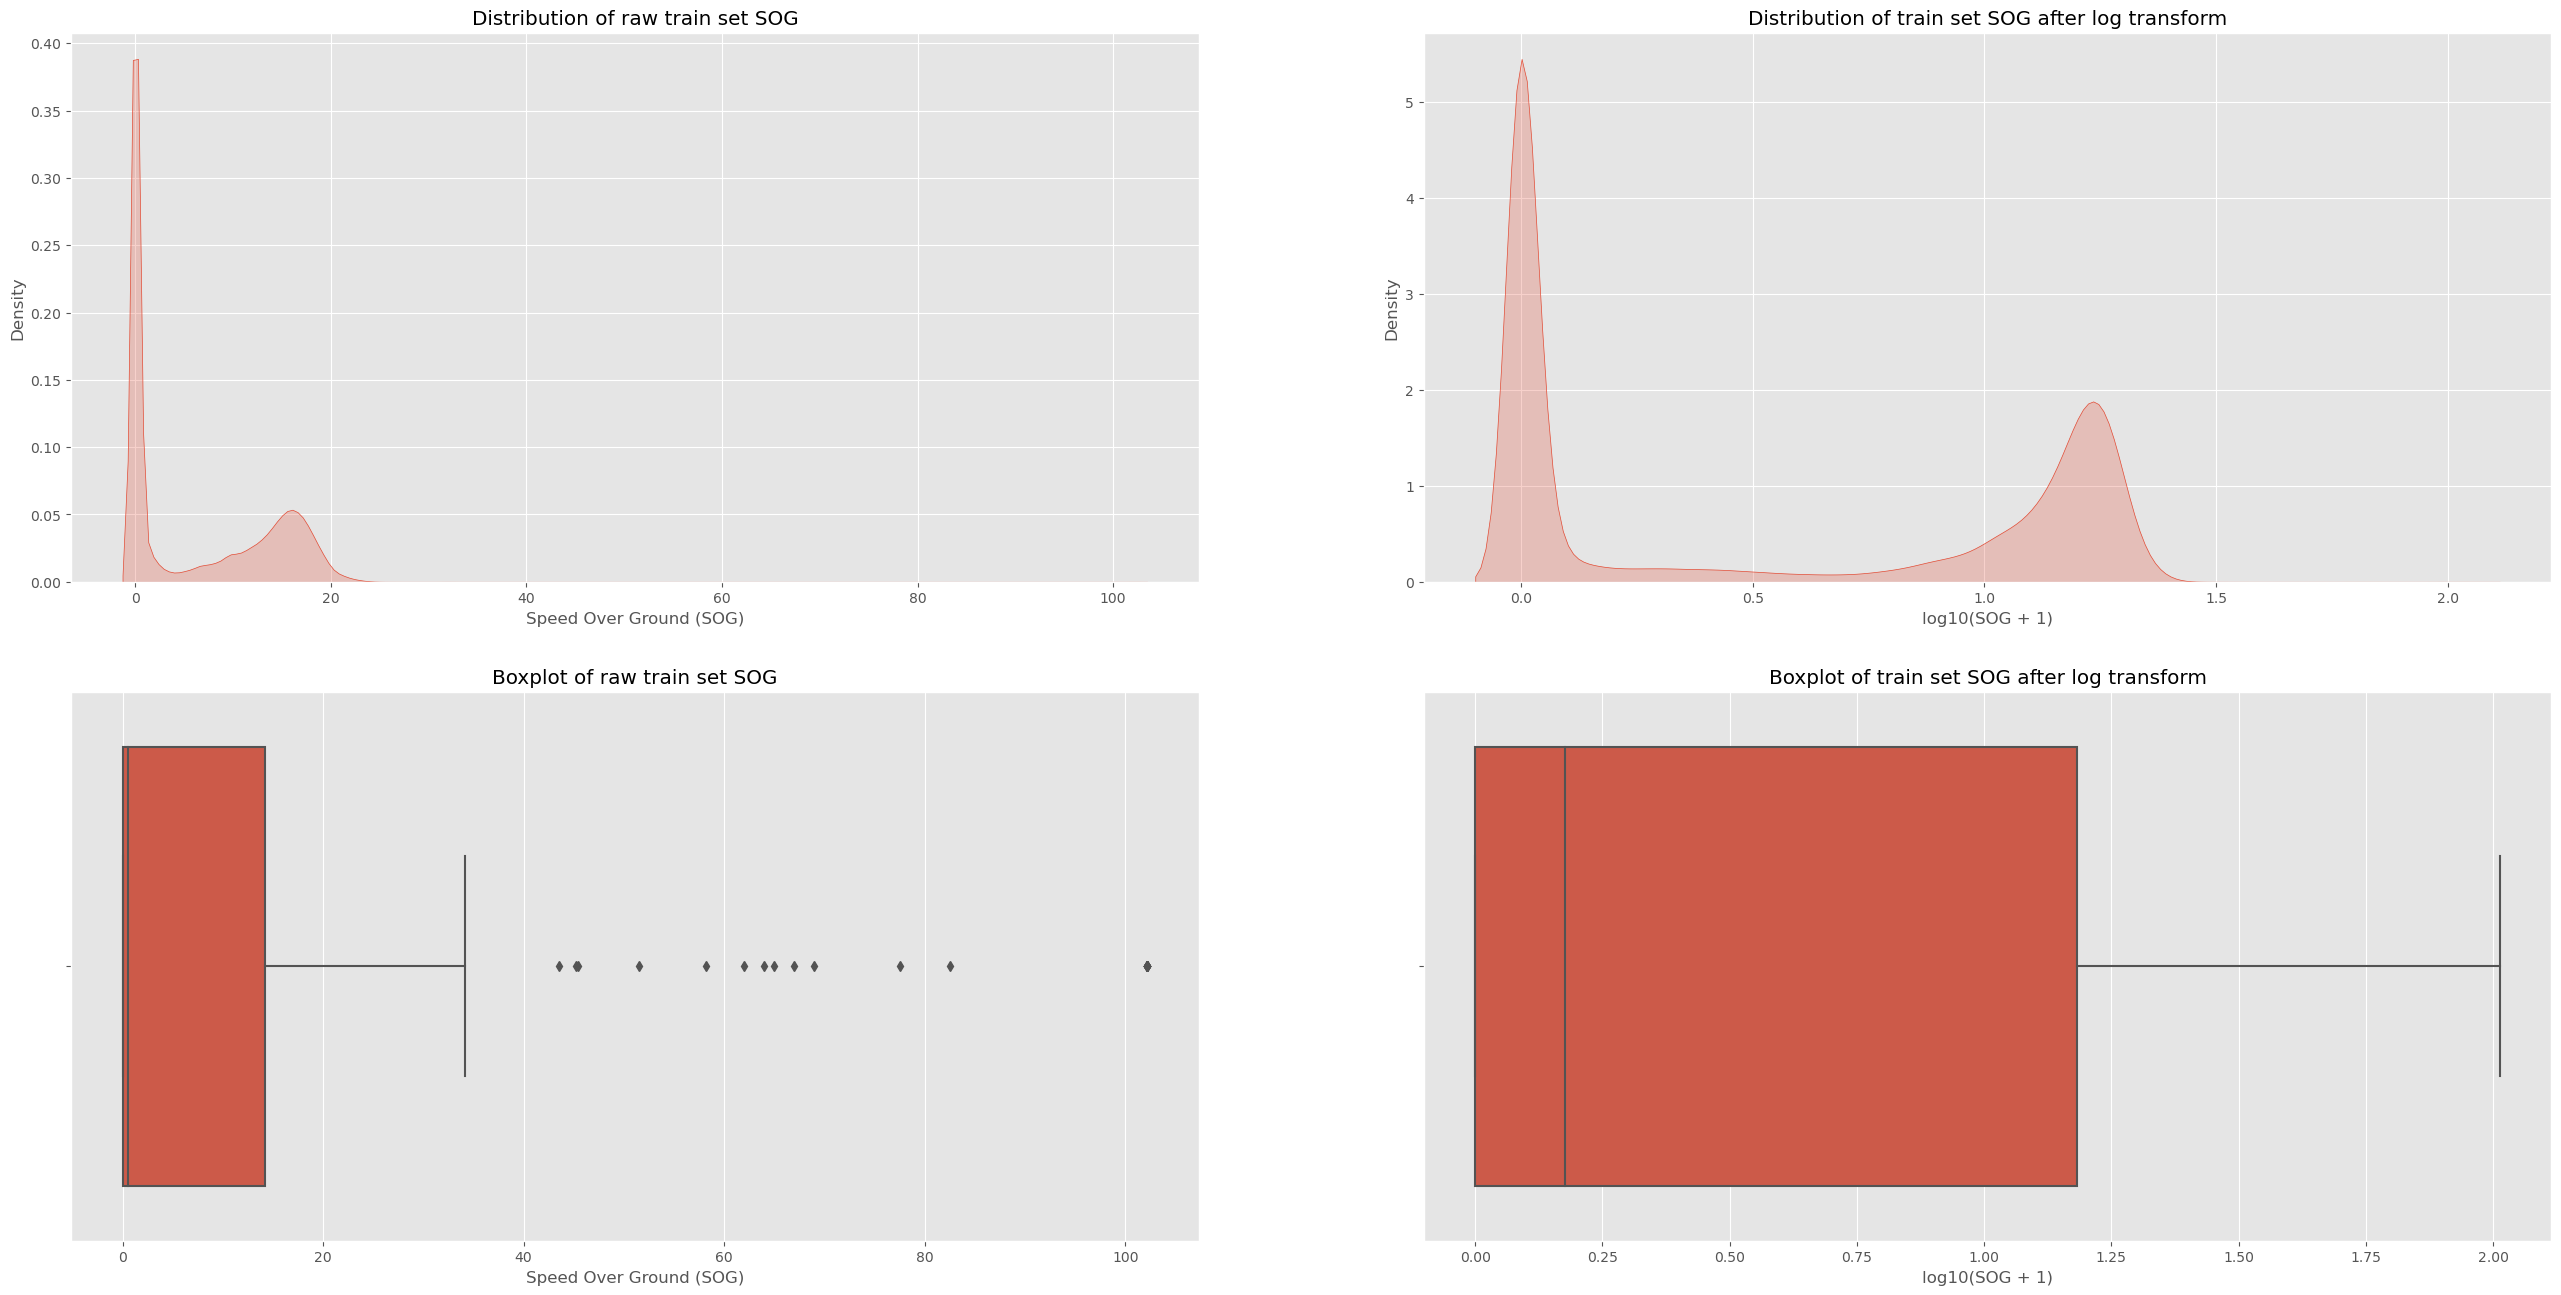

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up subplots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(32, 16), nrows=2, ncols=2, dpi=100)

# Kernel density plot for raw SOG values
sns.kdeplot(data.train.sog.rename('Speed Over Ground (SOG)'), shade=True, ax=ax1)
ax1.set_title('Distribution of raw train set SOG');

# Kernel density plot for log-transformed SOG values
sns.kdeplot(x=np.log10(data.train.sog + 1).rename('log10(SOG + 1)'), shade=True, ax=ax2)
ax2.set_title('Distribution of train set SOG after log transform');

# Box plot for raw SOG values
sns.boxplot(data.train.sog.rename('Speed Over Ground (SOG)'), ax=ax3)
ax3.set_title('Boxplot of raw train set SOG');

# Box plot for log-transformed SOG values
sns.boxplot(x=np.log10(data.train.sog + 1).rename('log10(SOG + 1)'), ax=ax4)
ax4.set_title('Boxplot of train set SOG after log transform');

# Check for NaN values in SOG
print("Number of NaN values in SOG:", data.train['sog'].isnull().sum())


In [17]:

print(df_train['sog'].head(3))
df_train['sog'] = df_train['sog'].apply(lambda x: np.log10(x));

print(df_train['sog'].head(3))


0         NaN
1         NaN
2    0.017615
Name: sog, dtype: float64
0         NaN
1         NaN
2   -1.754129
Name: sog, dtype: float64


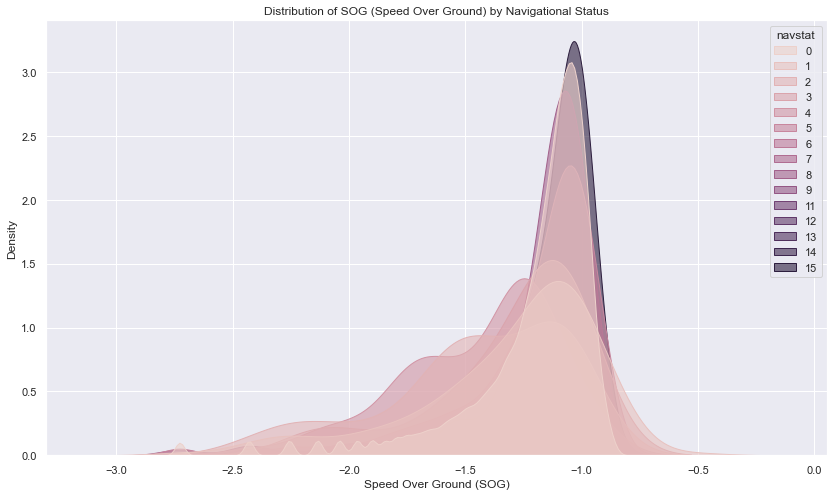

In [28]:
# Plot KDE for SOG segmented by navigation status
plt.figure(figsize=(14, 8))
sns.kdeplot(data=data.train, x='sog', hue='navstat', fill=True, common_norm=False, alpha=0.6)
plt.title('Distribution of SOG (Speed Over Ground) by Navigational Status')
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Density')
plt.show()


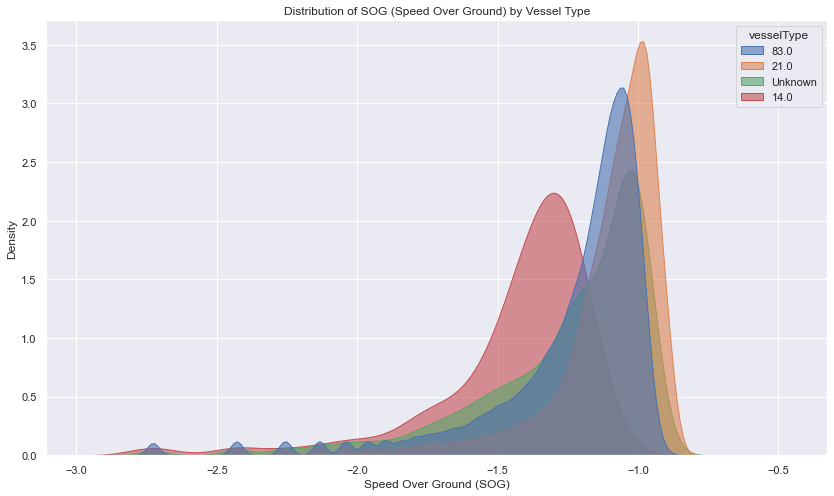

In [29]:

# Segment by vessel type 
plt.figure(figsize=(14, 8))
sns.kdeplot(data=data.train, x='sog', hue='vesselType', fill=True, common_norm=False, alpha=0.6)
plt.title('Distribution of SOG (Speed Over Ground) by Vessel Type')
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Density')
plt.show()

#### COG

In [21]:
# Define ranges for COG categories
def categorize_cog(cog):
    if cog >= 0 and cog < 90:
        return 'North-East'
    elif cog >= 90 and cog < 180:
        return 'South-East'
    elif cog >= 180 and cog < 270:
        return 'South-West'
    elif cog >= 270 and cog <= 360:
        return 'North-West'
    else:
        return 'Unknown'

# Apply the COG categorization to the entire dataset
data.all['cog_category'] = data.all['cog'].apply(categorize_cog)

# Count the number of entries in each COG category
print('Number of vessels in each COG category (train + test):')
print('North-East:', data.all.loc[data.all['cog_category'] == 'North-East'].shape[0])
print('South-East:', data.all.loc[data.all['cog_category'] == 'South-East'].shape[0])
print('South-West:', data.all.loc[data.all['cog_category'] == 'South-West'].shape[0])
print('North-West:', data.all.loc[data.all['cog_category'] == 'North-West'].shape[0])
print('Unknown:', data.all.loc[data.all['cog_category'] == 'Unknown'].shape[0])

# Check for NaN values in the COG column
print("Number of NaN values in COG:", data.train['cog'].isnull().sum())


Number of vessels in each COG category (train + test):
North-East: 426961
South-East: 316021
South-West: 400817
North-West: 372161
Unknown: 51739
Number of NaN values in COG: 0


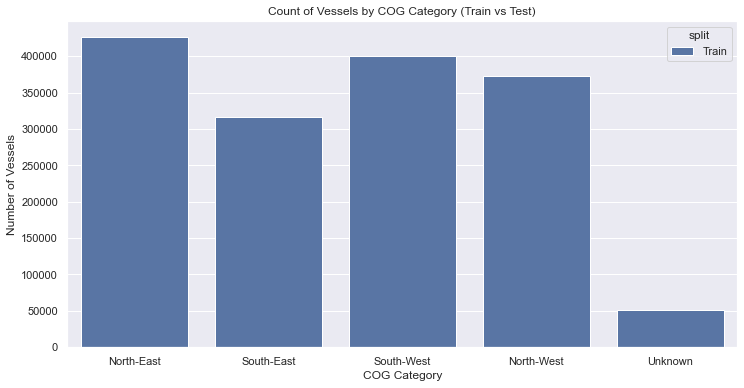

In [22]:
sns.set(style="darkgrid", rc={'figure.figsize': (11.7, 8.27)})

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(12, 6))
cog_categories = ['North-East', 'South-East', 'South-West', 'North-West', 'Unknown']
sns.countplot(x='cog_category', hue='split', data=data.all, order=cog_categories, ax=ax)

# Set the title and labels
ax.set_title('Count of Vessels by COG Category')
ax.set_xlabel('COG Category')
ax.set_ylabel('Number of Vessels')

# Show the plot
plt.show()


#### Rate of Turn (ROT)


In [ ]:
# KDE plot for ROT
plt.figure(figsize=(14, 8))
sns.kdeplot(data=data.train, x='rot', fill=True, common_norm=False, alpha=0.6)
plt.title('Distribution of ROT (Rate of Turn)')
plt.xlabel('Rate of Turn (ROT)')
plt.ylabel('Density')
plt.show()

# Scatter plot of ROT vs. SOG to show patterns between speed and turning rate
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data.train, x='sog', y='rot', hue='navstat', alpha=0.6)
plt.title('Scatter Plot of SOG vs. ROT by Navigational Status')
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Rate of Turn (ROT)')
plt.show()